## Introduction to Activation Functions

### What is an Activation Function?

An activation function is a mathematical function applied to the output of a neuron in a neural network. It introduces non-linearity into the network, allowing it to learn and perform complex tasks.

### Why are Activation Functions Used in Neural Networks?

1. Non-linearity: They allow the network to learn complex patterns by introducing non-linear properties.
2. Output Transformation: They scale the output of a neuron to a desired range.
3. Gradient Propagation: They help in backpropagation by providing gradients.
4. Sparsity: Some activation functions (like ReLU) can induce sparsity in the network.

### Key Properties of Activation Functions:

1. Non-linearity
2. Differentiability
3. Range
4. Monotonicity
5. Computational Efficiency

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erf

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# Helper function to plot activation functions and their derivatives on the same plot
def plot_function_and_derivative(func, derivative, title, x_range=(-5, 5)):
    x = np.linspace(*x_range, 200)
    y = func(x)
    dy = derivative(x)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot the function
    ax1.plot(x, y, label=f'{title} Function', color='b')
    ax1.set_title(f'{title} Function')
    ax1.set_xlabel('x')
    ax1.set_ylabel(f'{title}(x)')
    ax1.grid(True)
    ax1.legend()
    
    # Plot the derivative
    ax2.plot(x, dy, label=f'{title} Derivative', color='r')
    ax2.set_title(f'{title} Derivative')
    ax2.set_xlabel('x')
    ax2.set_ylabel(f'{title}\'(x)')
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()


### Sigmoid Function
The sigmoid function maps any input to a value between 0 and 1. It's S-shaped and symmetric around 0.

- Formula: $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
- Range: $$(0, 1)$$
- Derivative: $$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$
- Derivative Range: $$(0, 0.25)$$

#### Advantages:
- Smooth gradient, making it useful for backpropagation.
- Output is bounded, which makes it useful for binary classification.
- Activation can be interpreted as a probability, which is useful in some tasks like binary classification.

#### Disadvantages:
- Suffers from **vanishing gradient** for very large or small input values, which can slow down learning in deep networks.
- Outputs are **not zero-centered**, which can make gradient updates inefficient.
- Computationally expensive due to the exponential function.

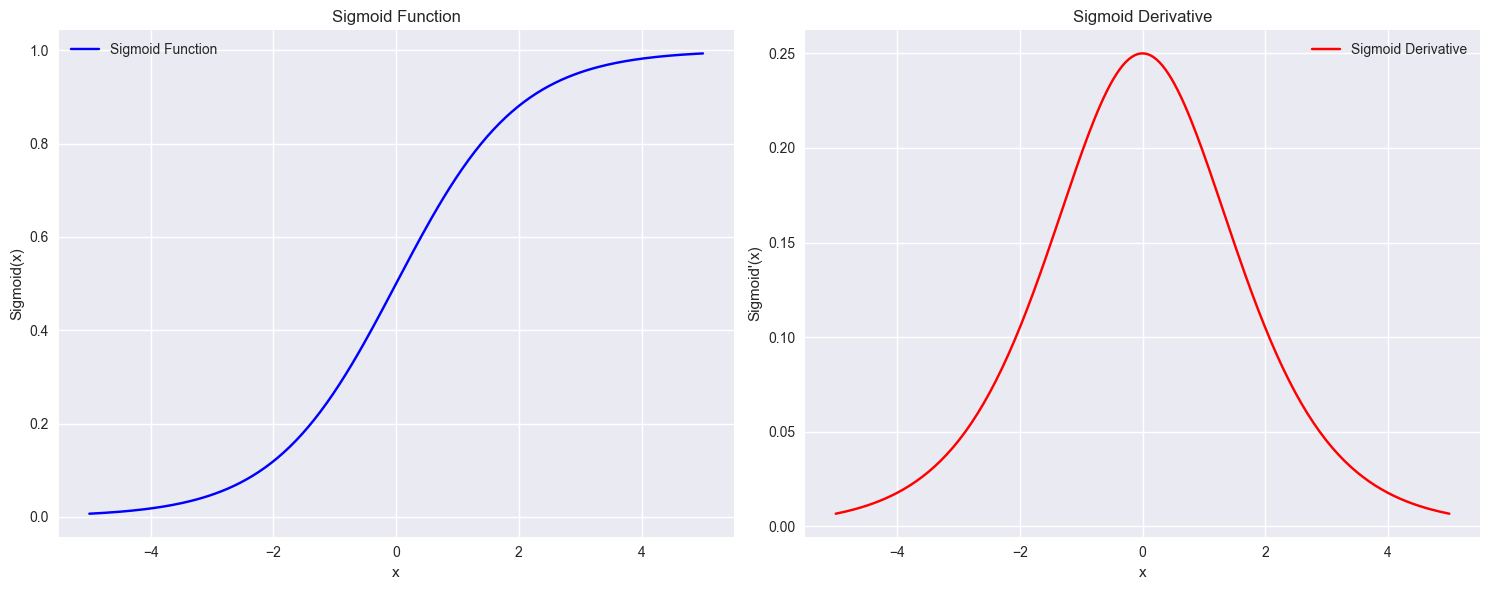

In [8]:
## 1. Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

plot_function_and_derivative(sigmoid, sigmoid_derivative, "Sigmoid")

Q: Why does the sigmoid function suffer from the vanishing gradient problem?

A: The derivative of the sigmoid function has a maximum value of 0.25, which occurs when the input is 0. For large positive or negative inputs, the derivative becomes very close to zero. This can lead to very small gradients during backpropagation, especially in deep networks, making it difficult for the network to learn.

### Tanh Function

Tanh squashes inputs to a range between -1 and 1. It's similar to the sigmoid but zero-centered.

- Formula: $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$
- Range: $$(-1, 1)$$
- Derivative: $$\tanh'(x) = 1 - \tanh^2(x)$$
- Derivative Range: $$(0, 1)$$

#### Advantages:
- **Zero-centered** output helps with faster convergence during training.
- Used in recurrent neural networks (RNNs) as it works well with sequences of data.
- Strong gradients compared to sigmoid, which helps learning.

#### Disadvantages:
- Suffers from the **vanishing gradient problem** for large positive or negative inputs, similar to sigmoid.
- Computationally more expensive than ReLU.

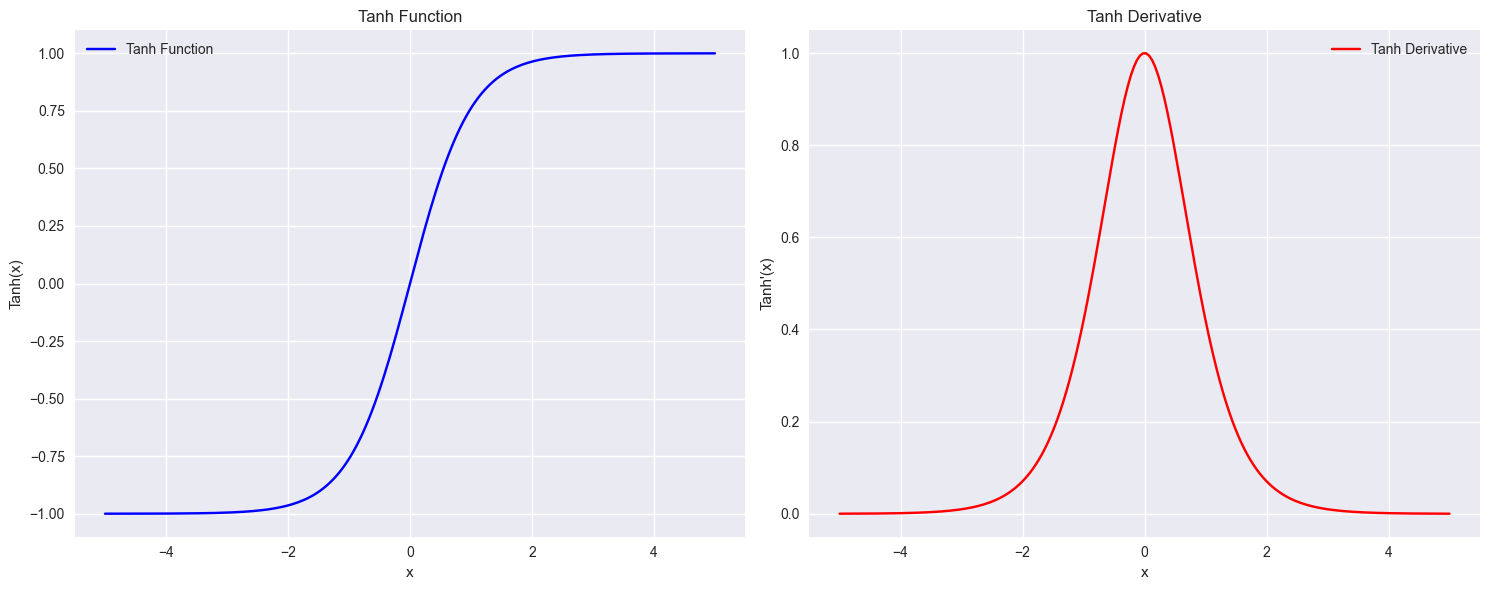

In [9]:
## 2. Tanh and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

plot_function_and_derivative(tanh, tanh_derivative, "Tanh")

Q: Why is tanh often preferred over sigmoid in hidden layers?

A: Tanh is often preferred because it's zero-centered, which can help in centering the data for the next layer. This property can lead to faster convergence during training compared to sigmoid. Additionally, the range of tanh (-1 to 1) is wider than sigmoid (0 to 1), which can help mitigate the vanishing gradient problem to some extent.

### Rectified Linear Unit - ReLU Function
ReLU is one of the most widely used activation functions in modern neural networks.

- Formula: $$\text{ReLU}(x) = \max(0, x)$$
- Range: $$(0, \infty)$$
- Derivative: 

$$
\text{ReLU}'(x) = 
\begin{cases} 
0 & \text{if } x \leq 0 \\
1 & \text{if } x > 0
\end{cases}
$$


#### Advantages:
- **Mitigates vanishing gradient problem** by providing constant gradient for positive inputs.
- Sparse activation: neurons output zero for negative inputs, which can make the network more efficient.
- Computationally efficient: very simple and fast to compute.

#### Disadvantages:
- Suffers from the **"dead neuron"** problem: neurons can stop learning if they output zero for all inputs (due to negative inputs).
- Not zero-centered, which could slow down convergence in some cases.

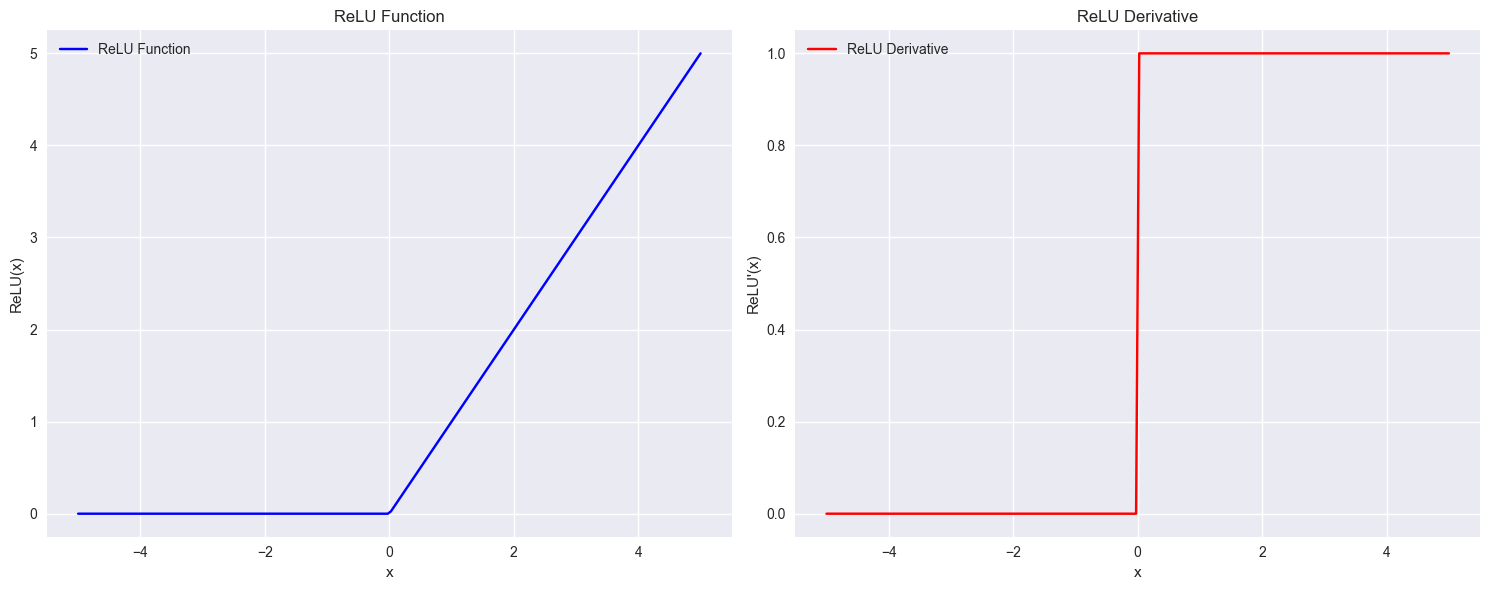

In [10]:
## 3. ReLU (Rectified Linear Unit)
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

plot_function_and_derivative(relu, relu_derivative, "ReLU")

Q: How does ReLU help with the vanishing gradient problem?

A: ReLU has a constant gradient of 1 for all positive inputs, which allows the gradient to flow back through the network without diminishing (for active neurons). This helps prevent the vanishing gradient problem, especially in deep networks.

### Leaky ReLU Function
Leaky ReLU allows a small, non-zero gradient for negative inputs, which helps to avoid the "dead neuron" problem.

- Formula: 
$$\text{Leaky ReLU}(x) = \begin{cases} 
\alpha x & \text{if } x < 0 \\
x & \text{if } x \geq 0
\end{cases}$$

(where α is a small constant, typically 0.05)
- Range: $$(-\infty, \infty)$$
- Derivative:

$$
\text{Leaky ReLU}'(x) = 
\begin{cases} 
\alpha & \text{if } x < 0 \\
1 & \text{if } x \geq 0
\end{cases}
$$

#### Advantages:
- **Avoids the dead neuron problem** by maintaining a small gradient for negative inputs.
- Similar advantages to ReLU: computational efficiency and mitigating the vanishing gradient problem.

#### Disadvantages:
- The slope of the negative part is arbitrary and can require tuning.
- Still not zero-centered, which can impact weight updates.

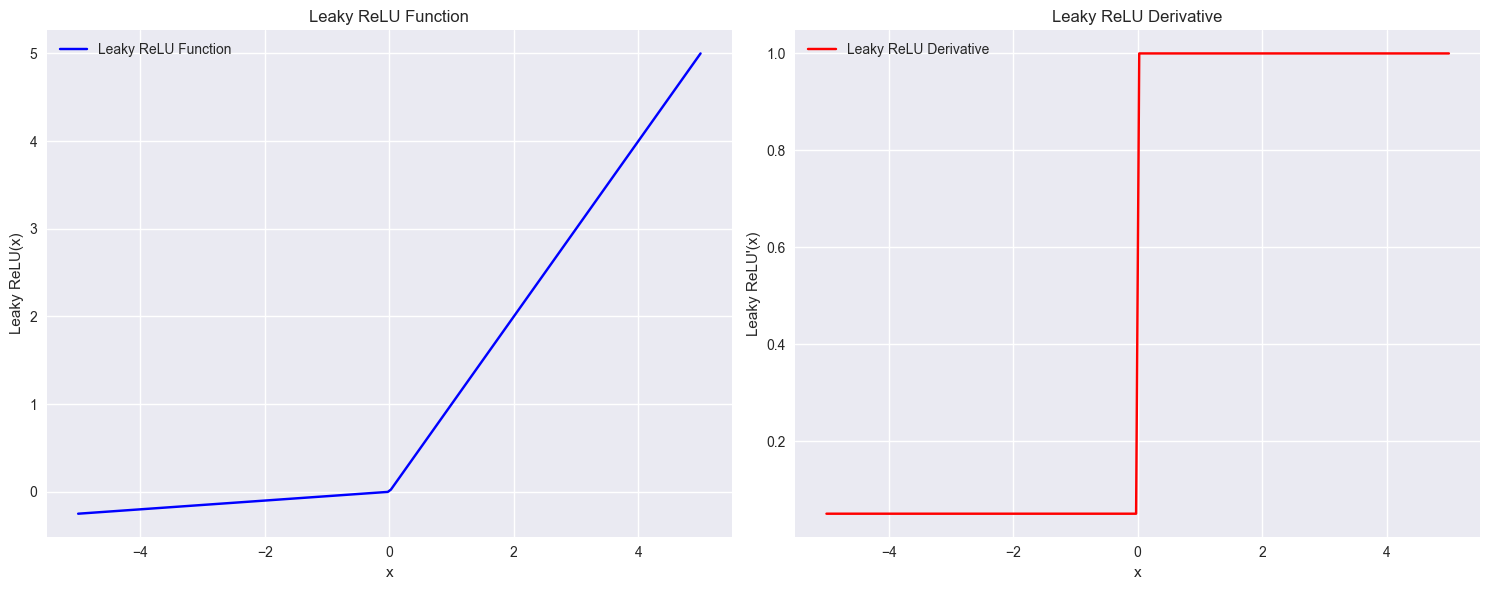

In [11]:
## 4. Leaky ReLU

alpha = 0.05

def leaky_relu(x, alpha=alpha):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=alpha):
    return np.where(x > 0, 1, alpha)

plot_function_and_derivative(leaky_relu, leaky_relu_derivative, "Leaky ReLU")

Q: How does Leaky ReLU solve the **dead neuron** problem?

A: Leaky ReLU allows a small, non-zero gradient α for negative inputs, unlike standard ReLU which has a gradient of 0 for negative inputs. This small gradient prevents neurons from getting stuck in a state where they never activate and thus never update their weights.

### ELU Function
ELU is similar to ReLU but includes an exponential component for negative values, which helps reduce the vanishing gradient issue.

- Formula:
$$\text{ELU}(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha(e^x - 1) & \text{if } x \leq 0
\end{cases}$$
- Range: $$(-\alpha, \infty)$$
- Derivative:
$$\text{ELU}'(x) = \begin{cases} 
1 & \text{if } x > 0 \\
\text{ELU}(x) + \alpha & \text{if } x \leq 0
\end{cases}$$


#### Advantages:
- Avoids the **dead neuron** problem by ensuring non-zero gradients for negative inputs.
- Can result in faster convergence by allowing negative values.
- Smooth curve helps with gradient flow.

#### Disadvantages:
- More computationally expensive than ReLU.
- Requires tuning of the **alpha** parameter.

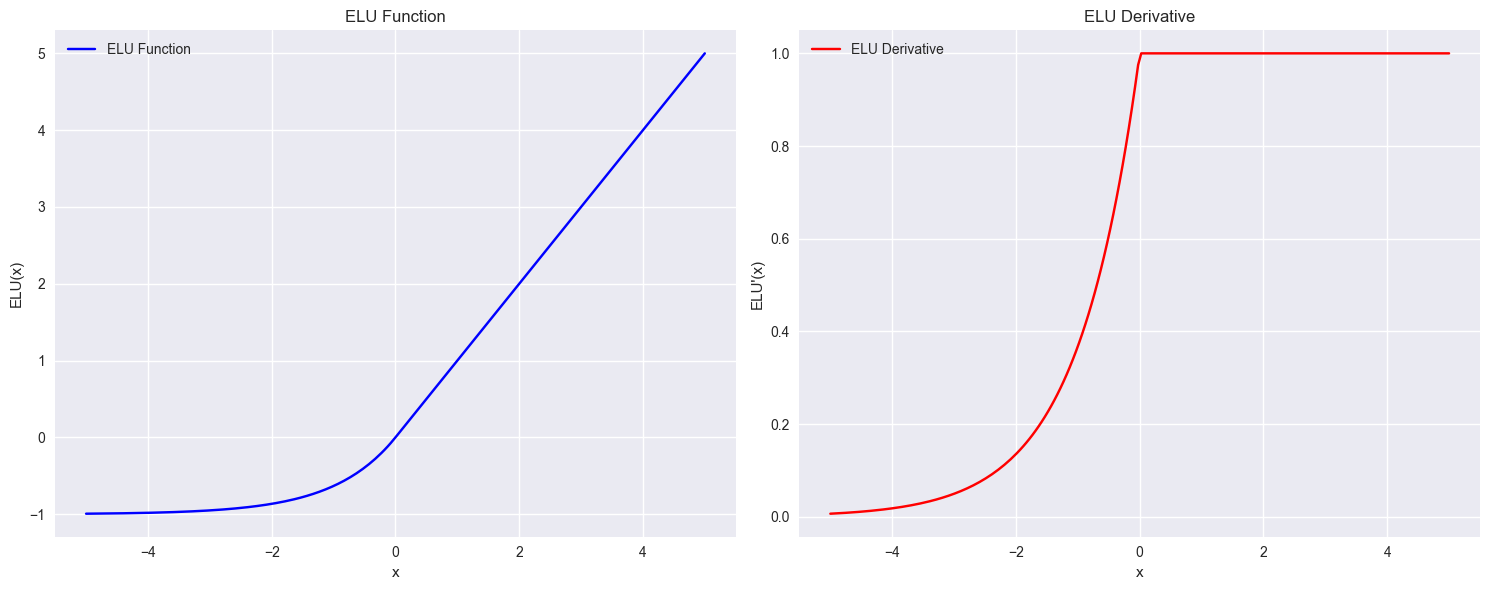

In [12]:
## 5. ELU and its derivative
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

plot_function_and_derivative(elu, elu_derivative, "ELU")

Q: How does ELU compare to ReLU and Leaky ReLU?

A: ELU addresses some limitations of both ReLU and Leaky ReLU:
1. Unlike ReLU, ELU can produce negative outputs, which can help push the mean activation closer to zero. This can speed up learning.
2. ELU has a smooth curve for negative values, unlike the sharp transition in Leaky ReLU. This can lead to more robust learning.
3. For positive inputs, ELU behaves identically to ReLU, preserving its benefits for these cases.
4. The negative values in ELU saturate, which can make it more robust to noise compared to Leaky ReLU.
